# Experiment Variables

The depedent variable is the time taken to name the ink colors. The independent variables are the ink color and the word displayed.

# Establish a hypothesis and statistical test


For this experiment we would like to investigate if color names printed in a different color impact on the respone time of the participants when compared to color names printed in the same color.

Statistical units for this test are tested twice (one time for the congruent words condition and one time for the incongruent words condition) so we are dealing with a dependant t-test for paired samples. For this test the difference in the response time between the two conditions has to be calculated for each unit.  

Null hypothesis : There is no impact. The average answer time for a population presented with congruent words is equal to the average answer time for a population presented with incongruent words. So the average difference in the response time between the two condition is null. &micro;0 = 0 where &micro;0 represent the average difference in the response time under the null hypothesis.

Alternative hypothese : There is an impact. The average answer time for a population presented with incongruent words is superior to the average answer time for a population presented with congruent words. Consequently the average difference in the response time between the incongruent condition and the congruent condition is positif. &micro;1 > 0
where &micro;1 represent the average difference in the response time under the alternative hypothesis.

For this statistical test the purpose is to compare two populations mean. Welch's t test is the appropriate statistical test for this task. Since we are only considering that the average response time for the incongruent words condition might be superior to the average response time for the congruent words condition we are performing a one tailed test. 

Also our population size is < 30 and we don't know the population standard deviation so we will use a t score to carry out the test.

Welch's t test assume that the two populations are normally distributed however their variances do not need to be equal.

The significance level is set at &alpha; = 0.01 so that we only have a 1% chance of making a Type 1 error


#  Descriptive statistics


In [3]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

stroop_data_frame = pd.read_csv('stroopdata.csv')
congruent_serie = stroop_data_frame['Congruent']
incongruent_serie = stroop_data_frame['Incongruent']

nb_congruent_serie = len(congruent_serie)
nb_incongruent_serie = len(incongruent_serie)

mean_congruent = congruent_serie.mean()
std_congruent = congruent_serie.std()

mean_incongruent = incongruent_serie.mean()
std_incongruent = incongruent_serie.std()

print('\nFor the congruent word condition the mean time is %f and the standart deviation is %f.' % (mean_congruent, std_congruent))
print('For the incongruent word condition the mean time is %f and the standart deviation is %f.' % (mean_incongruent, std_incongruent))

Populating the interactive namespace from numpy and matplotlib

For the congruent word condition the mean time is 14.051125 and the standart deviation is 3.559358.
For the incongruent word condition the mean time is 22.015917 and the standart deviation is 4.797057.


# Data Visualization

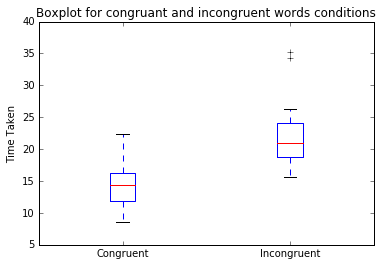

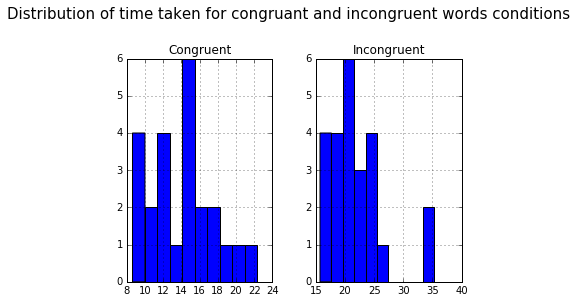

In [5]:
import pylab as pl

ax = stroop_data_frame.plot(kind='box', title='Boxplot for congruant and incongruent words conditions')
ax.set_ylabel("Time Taken")

ax = stroop_data_frame.hist()
pl.suptitle("Distribution of time taken for congruant and incongruent words conditions", fontsize=15, y=1.08)

From the plot displaying the data distribution we can observe that the data are not following a normal distribution. Therefore this test might not be very robust.

# Statistical Test and Results Interpretation

In [16]:
from scipy.stats import ttest_ind
import numpy as np

tstat = (mean_incongruent - mean_congruent) / ( (incongruent_serie - congruent_serie).std() / np.sqrt(nb_congruent_serie) )

print('\nThe T-statistic for this test is : %f' % (tstat,))
print('Given that the size of the sample is %d the degrees of freedom is %d' % (nb_congruent_serie, nb_congruent_serie-1))


The T-statistic for this test is : 8.020707
Given that the size of the sample is 24 the degrees of freedom is 23


Given that we are performing a one sided t-test with a significance level of 0.01 the critical value found using a t-table is 2.5.

We can observe that the t test computed 8.020707 is above the critical value 2.5 so we can reject the null hypothesis and claim that the average time taken to name the ink colors with incongruent words condition is superior to the average time taken to name the ink colors with congruent words condition

This result is the one I expected since the incongruent condition bring naturally some confusion into the participant mind and therefore slow down its response time. 

# References

1. http://pandas.pydata.org/pandas-docs/stable/visualization.html
2. https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples